# Data analysis on passengers of RMS Titanic

### Prasanga Dhakal
### 201459542


We are all familiar with the infamous sinking of the RMS Titanic. During her voyage from Southampton to New York City, on April 15, 1912, the Titanic sank after colliding with an iceberg. Many lives were lost and the tragedy shocked people all around the world. The main reason for the huge loss of lives was that there were only 20 lifeboats aboard. This made it highly unlikely for all the passengers to have had equal chances at survival. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others. In this project, I have analysed the data of the passengers to see what sort of people were likely to survive in the tragedy. 

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dem_titan = pd.read_csv("passengerdetails.csv")
dem_titan.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
dem_titan = dem_titan.drop(['Cabin','SibSp','Parch'],axis=1) #data cleaning, these columns were not used for the analysis
dem_titan.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S


Details of column names in "passengerdetails.csv":

-  survived: 0 implies No, 1 implies Yes
-  Pclass: Ticket class 1 is 1st, 2 is 2nd and 3 is 3rd
-  Ticket: Ticket number
-  Fare: Passenger fare
-  Embarked: Port of embarkation (C=Cherbourg, Q=Queenstown, S=Southampton)


## Analysis of survivors and the dead


Number of survivors and non-survivors : 
 0    549
1    342
Name: Survived, dtype: int64

Percentage of survivors and non-survivors : 
 0    61.616162
1    38.383838
Name: Survived, dtype: float64


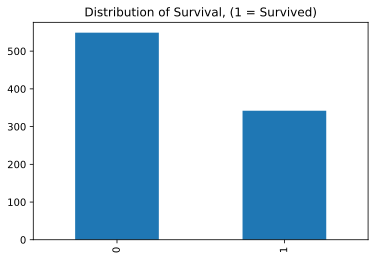

In [4]:
print("\nNumber of survivors and non-survivors : \n",dem_titan['Survived'].value_counts())
print("\nPercentage of survivors and non-survivors : \n",dem_titan['Survived'].value_counts() * 100 / len(dem_titan))

alpha_color = 0.5
dem_titan['Survived'].value_counts().plot(kind='bar')
plt.title("Distribution of Survival, (1 = Survived)")  


It can be seen that only 38% of the passengers survived. The Titanic was only carrying 20 lifeboats, which was not nearly enough for all the passengers and crew members aboard. Let's continue breaking down the data in order to examine the social attributes that determines who got a place on a lifeboat and who did not.

## What age group had the highest chance of survival?


Min age = 0.42
Max age = 80.0


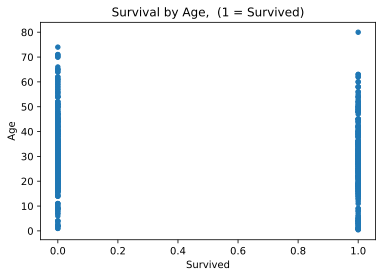

In [5]:
print("\nMin age =",dem_titan['Age'].min())
print("Max age =",dem_titan['Age'].max())

dem_titan.plot(kind='scatter',x='Survived',y='Age')
plt.title("Survival by Age,  (1 = Survived)")



Each dot represents a passenger in the above scatter diagram. The two distributions look quite similar which shows that there are passengers of almost all ages who both survived and did not survive.
In the Titanic, the luxurious first-class areas were completely off limits to the middle-class passengers in the second class, and especially to the third class passengers. In order to get an idea into the composition in each class, I grouped the data by class, and viewed the averages for each column.

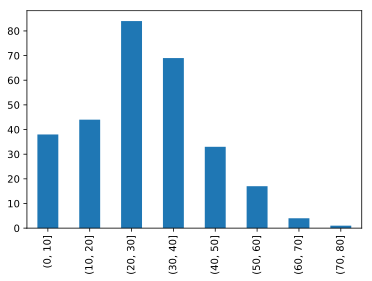

In [6]:
#Let's display the graph showing number of survivors in each age groups
b = [0, 10, 20, 30, 40, 50, 60, 70, 80,]
dem_titan['AgeBin'] = pd.cut(dem_titan['Age'],b)
dem_titan[dem_titan['Survived'] == 1]['AgeBin'].value_counts().sort_index().plot(kind='bar')

The passengers of ages 20-40 were the most surviving age groups. Now let's see if age was a good factor to determine the chance of survival. For this, I decided to see the plot for all the passengers (both survivors and non survivors).

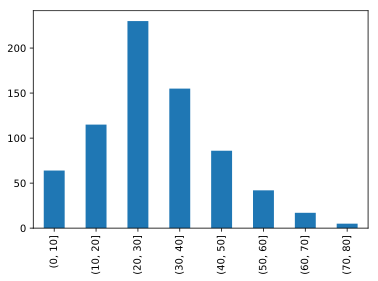

In [7]:
dem_titan['AgeBin'].value_counts().sort_index().plot(kind='bar')

The above two diagrams appear to be very similar. This seems to imply that age is not a determining factor for the chance of survival of a passenger. However, when we take a look at the age group 0-10, we can see the y-axis values in the two graphs have a very little difference. This shows that 0-10 age groups had a very good chance of survival.

## Now let's analyze the dataframe based on passenger's classes.



Number of passengers in each classes: 
 3    491
1    216
2    184
Name: Pclass, dtype: int64


,PassengerId,Survived,Age,Fare
Pclass,,,,
1,461.597222,0.629630,38.233441,84.154687
2,445.956522,0.472826,29.877630,20.662183
3,439.154786,0.242363,25.140620,13.675550


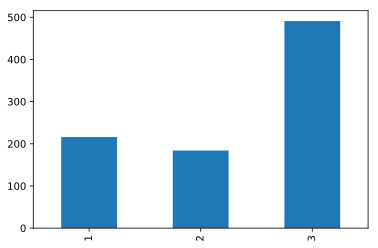

In [8]:
print("\n\nNumber of passengers in each classes: \n",dem_titan['Pclass'].value_counts())
dem_titan['Pclass'].value_counts().sort_index().plot(kind='bar')
dem_titan.groupby('Pclass').mean()

From the above table and the graph, we can get some interesting ideas. The passengers in the first class had the highest chance of survival, compared to those in the 3rd class. Also the lower classes generally consisted of younger people. The average ticket prices for the first class were predictably much higher than those for second and third classes.

Now let's see the density of all ages in each classes.

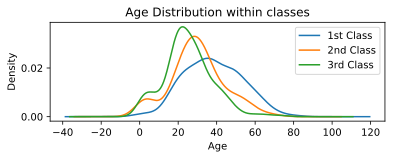

In [9]:
plt.subplot2grid((2,2),(0,0), colspan=2)
# plots a kernel density estimate of the subset of the 1st class passangers's age
dem_titan.Age[dem_titan.Pclass == 1].plot(kind='kde')    
dem_titan.Age[dem_titan.Pclass == 2].plot(kind='kde')
dem_titan.Age[dem_titan.Pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 


From the above graph, we can see that the lower classes generally consisted of younger people. Most elderly passengers (50+) were in the first class and some in the second class.

## Chances of survival for male and female passengers

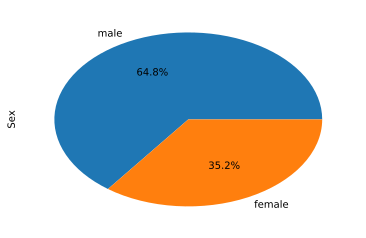

In [10]:
dem_titan['Sex'].value_counts().plot(kind='pie',autopct='%1.01f%%')

In [11]:
dem_titan[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


This shows that females had significantly higher chances of survival than the males. In order to better understand which class females and males actually managed to survive, I created the following table that lists all the averages of each columns according to class and sex.

In [12]:
genderclass = dem_titan.groupby(['Pclass','Sex']).mean()
genderclass


PassengerId  Survived        Age        Fare
Pclass Sex                                                 
1      female   469.212766  0.968085  34.611765  106.125798
       male     455.729508  0.368852  41.281386   67.226127
2      female   443.105263  0.921053  28.722973   21.970121
       male     447.962963  0.157407  30.740707   19.741782
3      female   399.729167  0.500000  21.750000   16.118810
       male     455.515850  0.135447  26.507589   12.661633

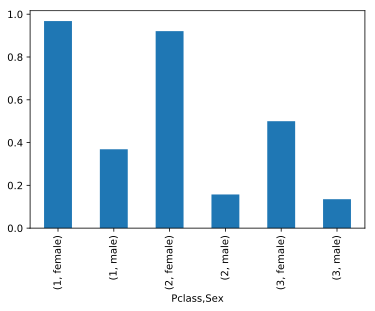

In [13]:
genderclass['Survived'].plot.bar()

The sex variable seems to be a decisive feature. Women are more likely to survive. From the age and sex data analysis, we can confirm that the sailors and captians of the Titanic followed the old code of conduct: "Women and children first!"

## Now let's see if the embarkation site affected the survival

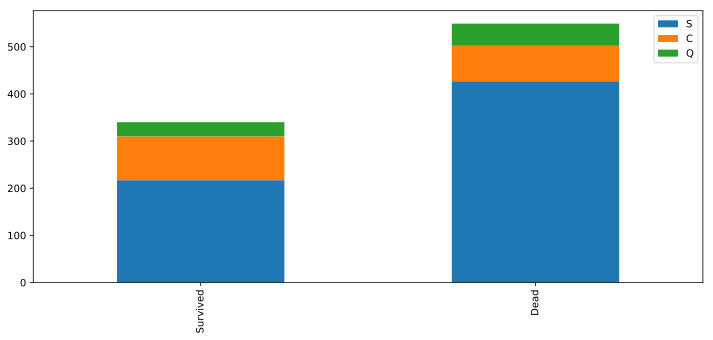

In [14]:
survived_embark = dem_titan[dem_titan['Survived']==1]['Embarked'].value_counts()
dead_embark = dem_titan[dem_titan['Survived']==0]['Embarked'].value_counts()
df = pd.DataFrame([survived_embark,dead_embark])
df.index = ['Survived','Dead']
df.plot(kind='bar', stacked=True, figsize=(12,5))

Both the survived and the dead bars have same proportion of site of embarkation. There seems to be no distinct correlation here.

## Predicting the survival chance using Scikit-learn

Now let's predict if the passengers will survive or not using machine learning and check how accurate it can get.

In [15]:
#we are going to predict the survived column, which is our target
col_target=['Survived']
#we are only taking age, sex, pclass and fare as they are only the ddetermining factors
col_train=['Age','Pclass','Sex','Fare']
#we separate the dataset into two variables
X=dem_titan[col_train]
Y=dem_titan[col_target]


Now we prepare the data so that there is no incompatible values in the data. Let's do a quick check on the dataset X.

In [16]:
X.describe()

,Age,Pclass,Fare
count,714.000000,891.000000,891.000000
mean,29.699118,2.308642,32.204208
std,14.526497,0.836071,49.693429
min,0.420000,1.000000,0.000000
25%,20.125000,2.000000,7.910400
50%,28.000000,3.000000,14.454200
75%,38.000000,3.000000,31.000000
max,80.000000,3.000000,512.329200


If we take a look at the count row of Age column, we can see the number is less than the total number of data rows. This means there are some passengers whose age has not been recorded. The empty age contain 'Nan' value in them. In order to solve this problem, I filled the empty values with the median age.

In [17]:
X["Age"] = X["Age"].fillna(X['Age'].median())
X['Age'].count()

C:\Users\Prasanga Dhakal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


891

So now the Age column also has 891 row entries. 

The "Sex" is a categorical variable which has two possible values "male" or "female". But in our sklearn model, we cannot pass String values as a categorical variable. Intead, we need to pass it as an integer. For that, we are going to replace male with 0 and female with 1.

In [18]:
dic = {'male':0,'female':1}
X['Sex']=X['Sex'].apply(lambda x:dic[x])


C:\Users\Prasanga Dhakal\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


We have successfully replaced the male value with 0 and female value with 1. Let's see what the X dataset looks like.

In [19]:
X.head()

,Age,Pclass,Sex,Fare
0,22.0,3,0,7.2500
1,38.0,1,1,71.2833
2,26.0,3,1,7.9250
3,35.0,1,1,53.1000
4,35.0,3,0,8.0500


Now let's start the training. Before starting, we need to split the whole dataset into training and test set so that after we train our model, we can check the accuracy of that model.

In [20]:
#splitting the data to taining and testing Dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33, random_state=42)

In [21]:
from sklearn import svm
#LinearSVC is a linear kernel class capable of performing multi-class classification on a dataset.It separates the data linearly
clf=svm.LinearSVC()
#trainig the model
clf.fit(X_train,Y_train)
print (clf)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)


C:\Users\Prasanga Dhakal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The training has been done successfully!

In [22]:
#now let's start the prediction
print (clf.predict(X_test[0:1]))
print (clf.predict(X_test[0:10]))
print (clf.score(X_test,Y_test))

[0]
[0 0 0 1 1 1 1 0 1 1]
0.803389830508


The score differs every time we run the notebook.